In [1]:
%%html
<marquee style='width: 100%; color: blue;'><b>Project 2 : Music Genre Identification</b></marquee>
<marquee style='width: 100%; color: red;'><b>By: Sachin Gaydhani on February 13, 2023</b></marquee>

## Shortcuts
Below is a **code cell**. Once the toolbar button indicates CONNECTED, click in the cell to select it and execute the contents in the following ways:

* Click the **Play icon** in the left gutter of the cell;
* Type **Cmd/Ctrl+Enter** to run the cell in place;
* Type **Shift+Enter** to run the cell and move focus to the next cell (adding one if none exists); or
* Type **Alt+Enter** to run the cell and insert a new code cell immediately below it.

There are additional options for running some or all cells in the **Runtime** menu.

* Esc + A : Insert a cell above the current cell
* Esc + B : Insert a cell below the current cell
* Ctrl + / : Comment the selected code

## Formal Problem Statement
#Project 2 : Music Genre Identification
Download data from here :  https://www.dropbox.com/s/4jw31k5mlzcmgis/genres.tar.gz?dl=0
Goal : Given audio files for songs , identify which genre they fall in 
Suggested Guidelines : 
1. You'll have to prepare and maintain your own version of train and validation from the full data given 
2. Major challenge here is to create features from audio files which can then be passed to your choice of deep learning algorithm 
3. Your solution needs to be uploaded on GitHub repo of your team



## Data Files
* genres.tar.gz
* https://www.dropbox.com/s/4jw31k5mlzcmgis/genres.tar.gz?dl=0

##NumPy
* It is a *third-party library* (i.e. it is not part of Python's standard library) that facilitates numerical computing in Python by providing users with a **versatile N-dimensional array** object for storing data, and powerful mathematical functions for operating on those arrays of numbers.

* NumPy is the reason why Python stands among the ranks of R, Matlab, and Julia, as one of the most popular languages for doing STEM-related computing.

* # ndarray 
https://numpy.org/doc/stable/reference/arrays.ndarray.html

* # NumPy Fundamentals 
https://numpy.org/doc/stable/user/basics.html#numpy-basics

* # NumPy Reference 
https://numpy.org/doc/stable/reference/index.html

In [2]:
import numpy as np

## Pandas
* Pandas is a Python library used for working with data sets.

* It has functions for analyzing, cleaning, exploring, and manipulating data.

* The name "Pandas" has a reference to both "Panel Data", and "Python Data Analysis" and was created by Wes McKinney in 2008

## Difference between NumPy & Pandas

* What is difference between pandas and NumPy?
The Pandas module mainly works with the tabular data, whereas the NumPy module works with the numerical data. The Pandas provides some sets of powerful tools like DataFrame and Series that mainly used for analyzing the data, whereas in NumPy module offers a powerful object called Array.

In [3]:
import pandas as pd

## Matplotlib
* Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible. Create publication quality plots. Make interactive figures that can zoom, pan, update.

https://matplotlib.org/stable/users/index

## matplotlib.pyplot
* matplotlib.pyplot is a collection of functions that make matplotlib work like MATLAB. Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc.

## matplotlib.style
* With matplotlib, we can style the plots like, an HTML webpage is styled by using CSS styles. We just need to import style package of matplotlib library.
* There are various built-in styles in style package, and we can also write customized style files and, then, to use those styles all you need to import them and apply on the graphs and plots. In this way, we need not write various lines of code for each plot individually again and again i.e. the code is reusable whenever required. 



## seaborn
* Seaborn is a library that uses Matplotlib underneath to plot graphs. It will be used to visualize random distributions.

## seaborn Vs Matplotlib
* The difference between seaborn vs matplotlib is that seaborn utilize a similarly basic syntax that is simpler to understand and learn, while matplotlib utilizes relatively lengthy and complex syntax

In [4]:
from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib import style
import seaborn as sns

In [5]:
import os
os.mkdir('train')
os.mkdir('test')
import json
import math
import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
from wordcloud import WordCloud, STOPWORDS

In [6]:
import librosa, librosa.display
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras

In [7]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K
import librosa
import librosa.display
import pylab
import matplotlib.pyplot as plt
from matplotlib import figure
import gc


#HOW HUMANS RECOGNIZE MUSIC ?
* Vibration of air molecules (Sound Waves)
* Capturing sounds waves with external ear
* Sending waves to middle air
* Converting sound waves into sound signals
* Sending signals through auditory nerves to brain

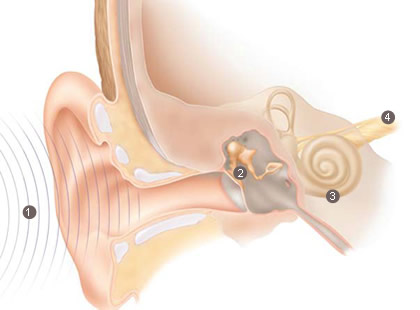

# HOW TO CONVERT ANALOG SIGNALS TO DIGITAL SIGNALS
* An analog signal is a continuous wave denoted by a sine wave (pictured below) and may vary in signal strength (amplitude) or frequency (time).
* A digital signal - a must for computer processing - is described as using binary (0s and 1s), and therefore, cannot take on any fractional values.
* We do quantization to get digital signals from analog signals. Digital computers can only capture this data at discrete moments in time. The rate at which a computer captures audio data is called the sampling rate.
* For example if we use 44.1 KHz sampling rate, it means that we use 44100 samples per second.
* Information: Humans can hear the sounds between 0-140 dB and 20-20000 Hz !

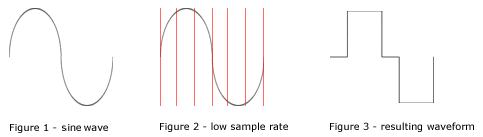

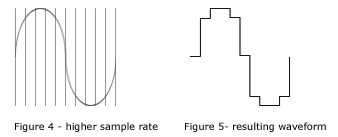

In [8]:
!wget https://www.dropbox.com/s/4jw31k5mlzcmgis/genres.tar.gz?dl=0

--2023-02-15 06:57:55--  https://www.dropbox.com/s/4jw31k5mlzcmgis/genres.tar.gz?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6022:18::a27d:4212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/4jw31k5mlzcmgis/genres.tar.gz [following]
--2023-02-15 06:57:56--  https://www.dropbox.com/s/raw/4jw31k5mlzcmgis/genres.tar.gz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9037141421eb40150ef71d511a.dl.dropboxusercontent.com/cd/0/inline/B2j5U8aXOU7crmkG5_-DSSzpeUBDb8mIveeI_lNrBo615wDnYUwmITtt3ROKI3rh0mnJMiqstVhpih-w45huOQrhrlK3PxBKK3GM78s3tHOhxcgjc69reqJg2_9FQTNoIth7qIU8QvsaH5ofuQuheVWCpRYAjs5EAv6TLsy4Waw5PA/file# [following]
--2023-02-15 06:57:56--  https://uc9037141421eb40150ef71d511a.dl.dropboxusercontent.com/cd/0/inline/B2j5U8aXOU7crmkG5_-DSSzpeUBDb8mIveeI_lNrBo615wDnYUwmITtt3ROKI3rh0mnJM

In [9]:
import tarfile

In [10]:
data = tarfile.open("genres.tar.gz?dl=0")

In [11]:
data.extractall('./')

In [12]:
data.close()

In [13]:
!pip install path

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
from path import Path

In [15]:
os.getcwd()

'/content'

In [16]:
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
genres

['blues',
 'classical',
 'country',
 'disco',
 'hiphop',
 'jazz',
 'metal',
 'pop',
 'reggae',
 'rock']

In [17]:
audio_fpath = "/content/genres/blues/"
audio_clips = os.listdir(audio_fpath)

print("No. of .wav files in audio folder = ",len(audio_clips))

No. of .wav files in audio folder =  100


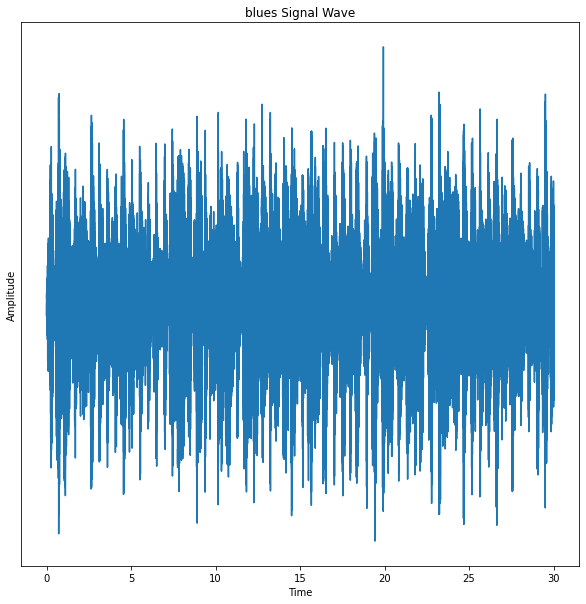

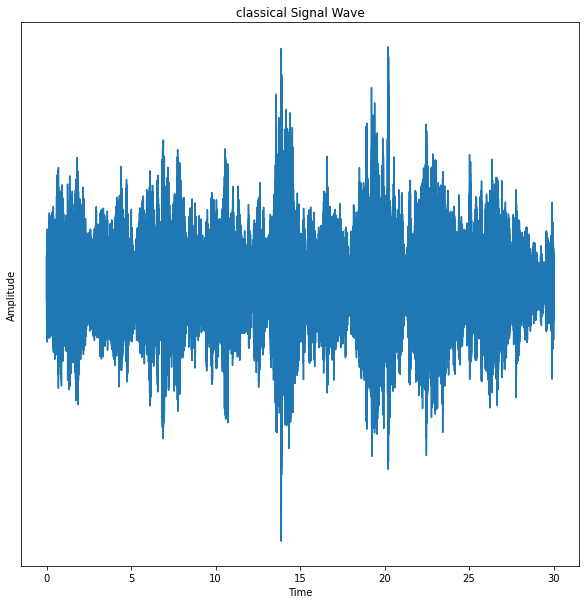

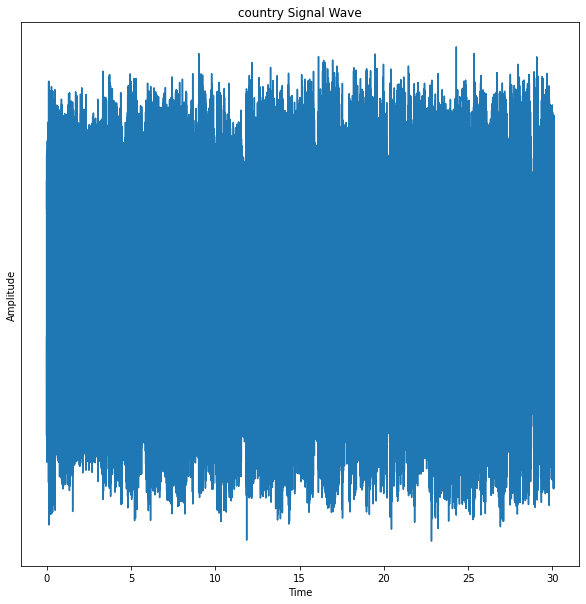

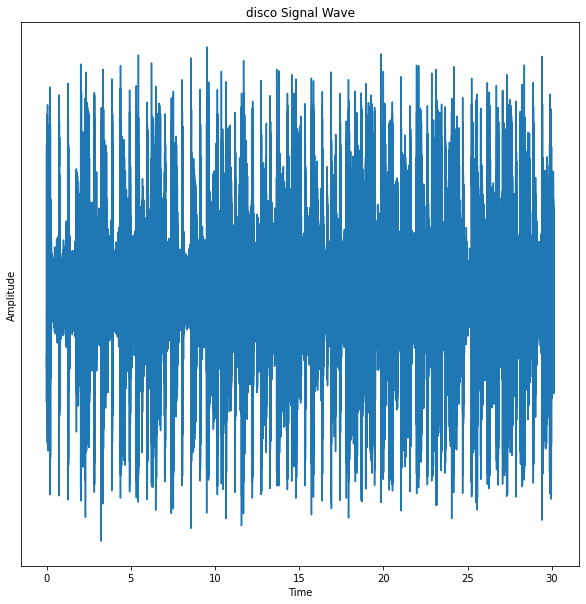

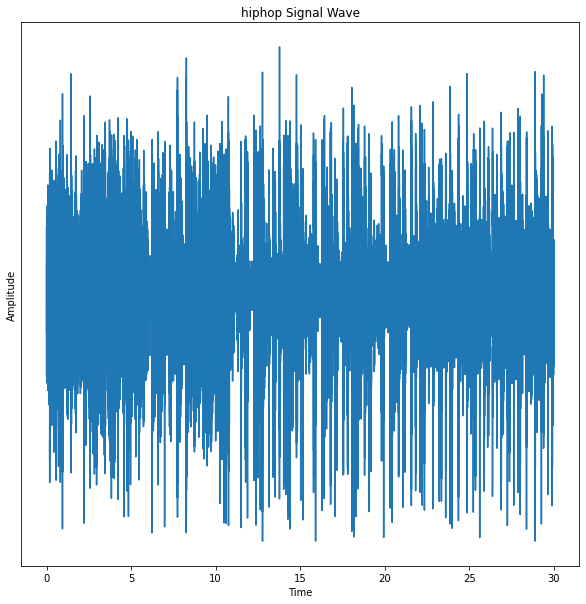

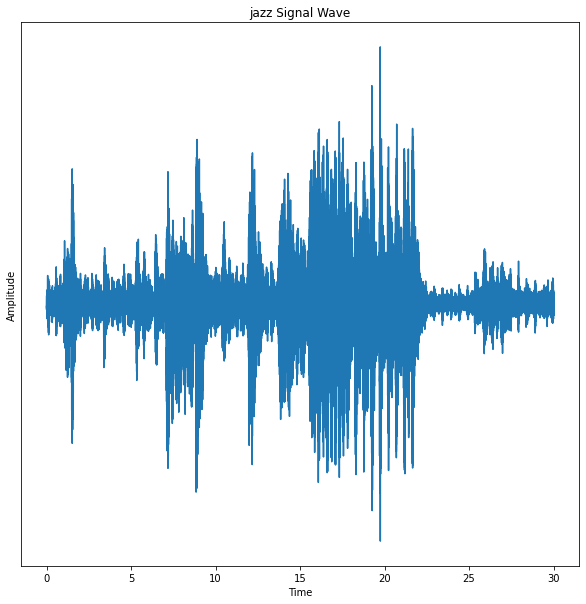

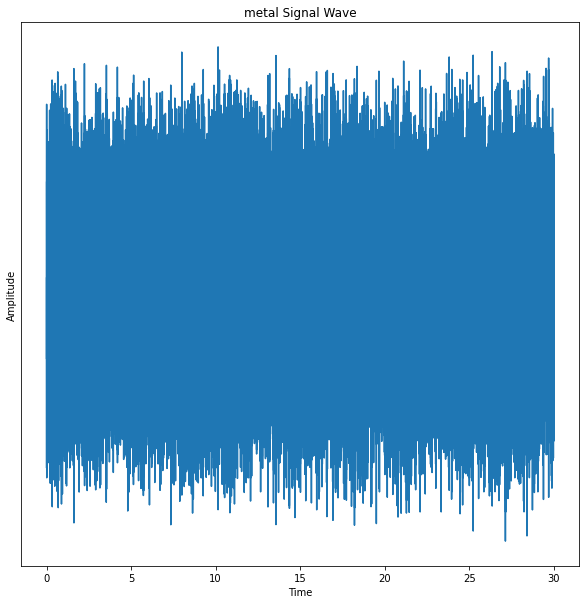

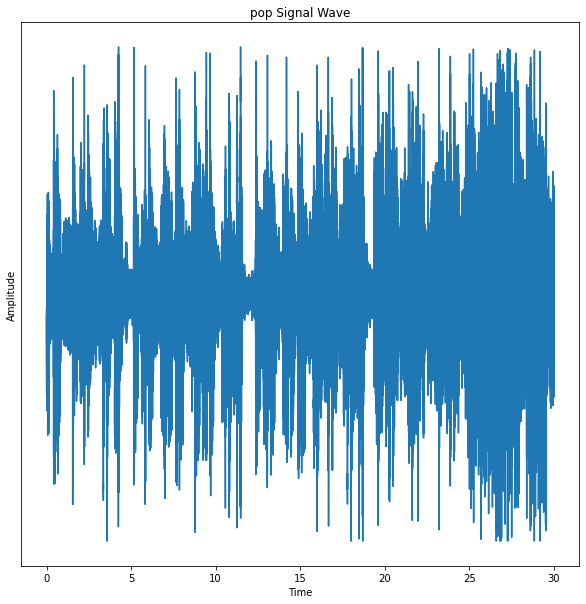

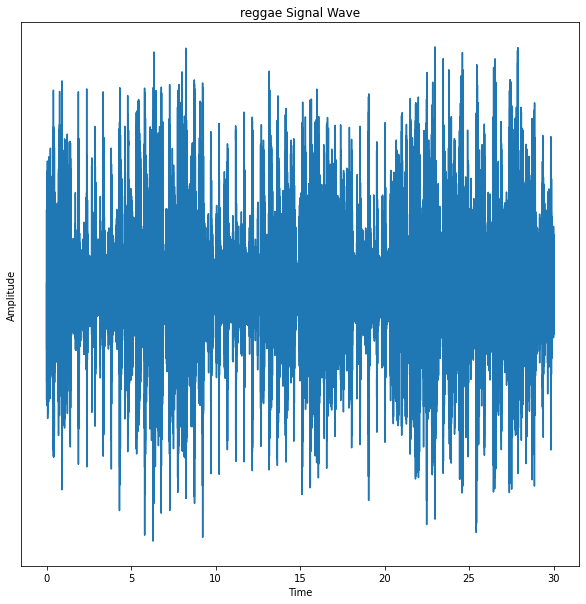

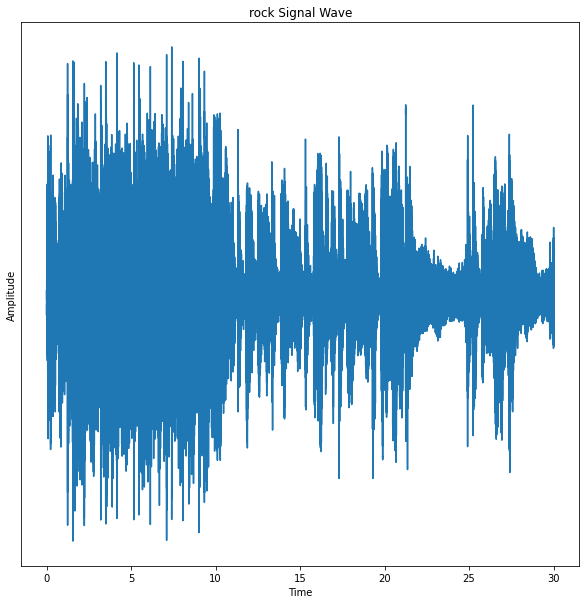

In [18]:
for i, g in enumerate(genres):
  y, sr=librosa.core.load(f'/content/genres/{g}/{g}.00000.au')
  time=np.linspace(0,len(y)/sr,num=len(y))
  plt.figure(i+1)
  plt.title(g +" Signal Wave")
  plt.yticks(ticks=[])
  plt.plot(time,y)
  plt.xlabel("Time")
  plt.ylabel("Amplitude")
  plt.show()

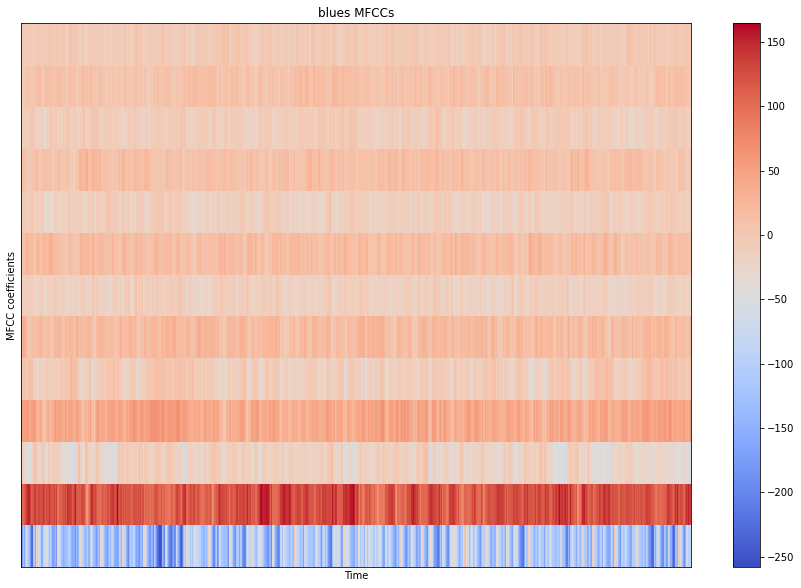

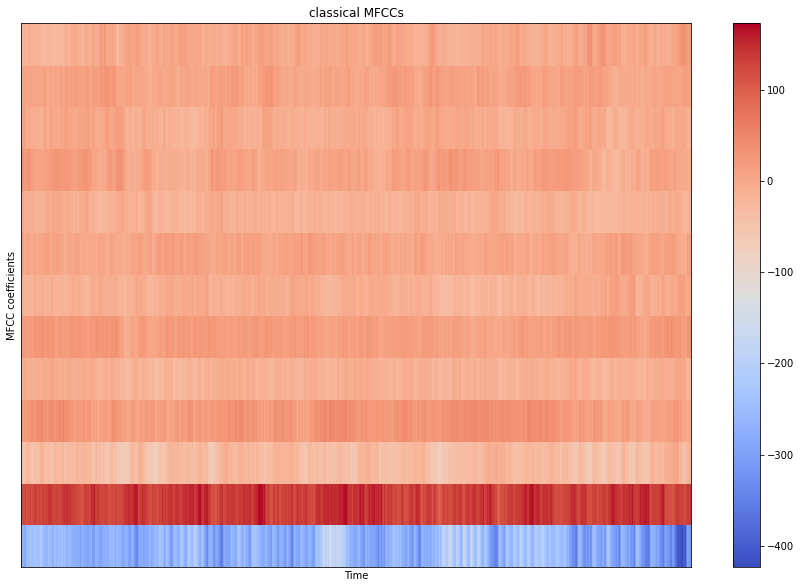

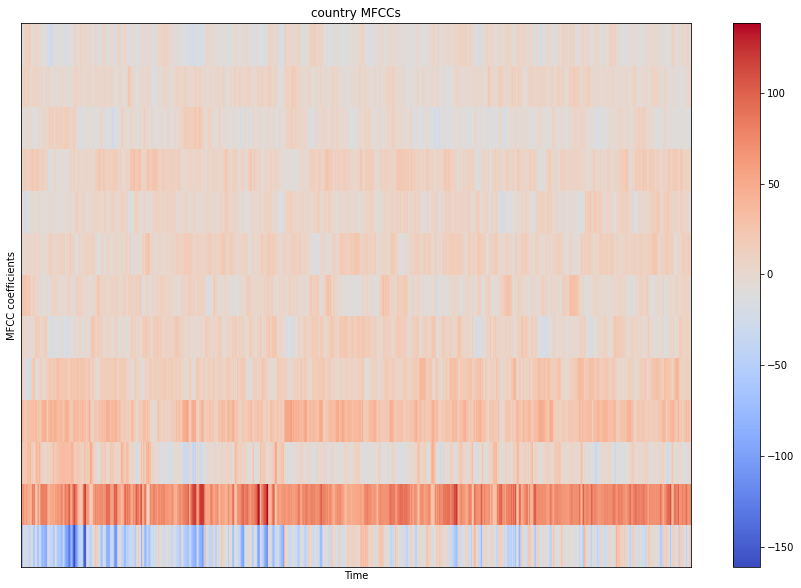

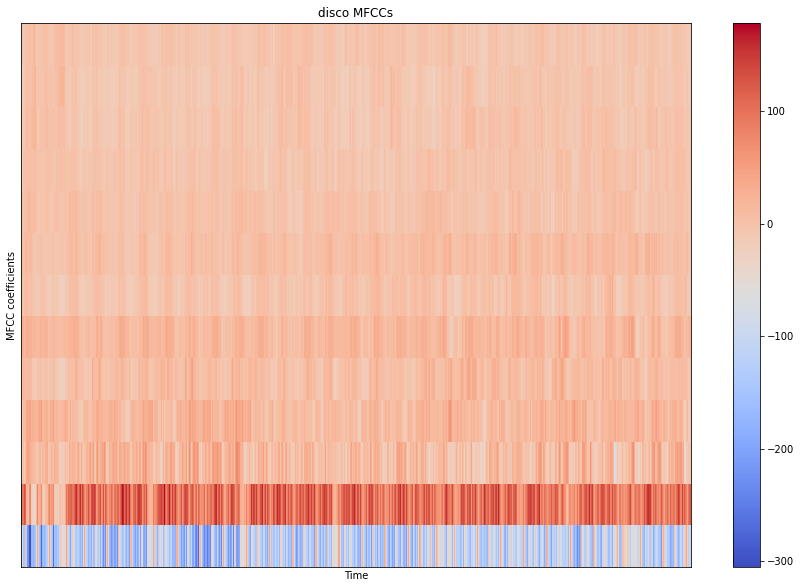

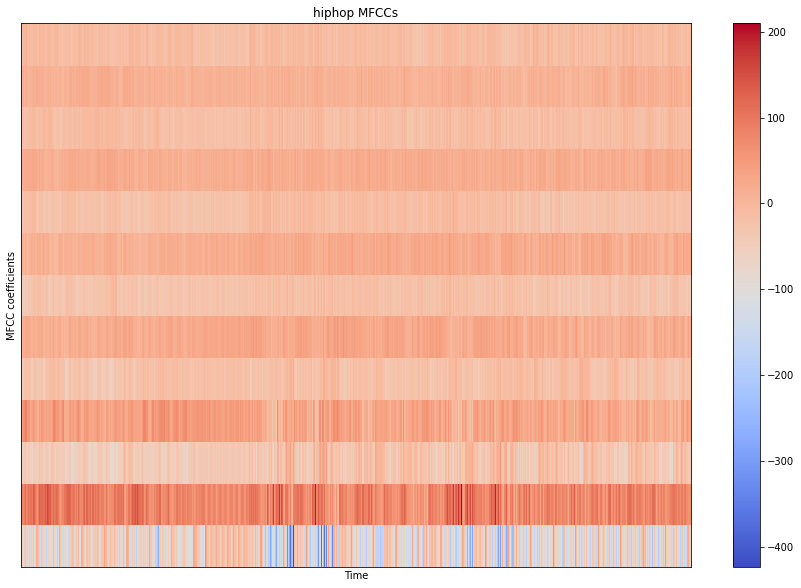

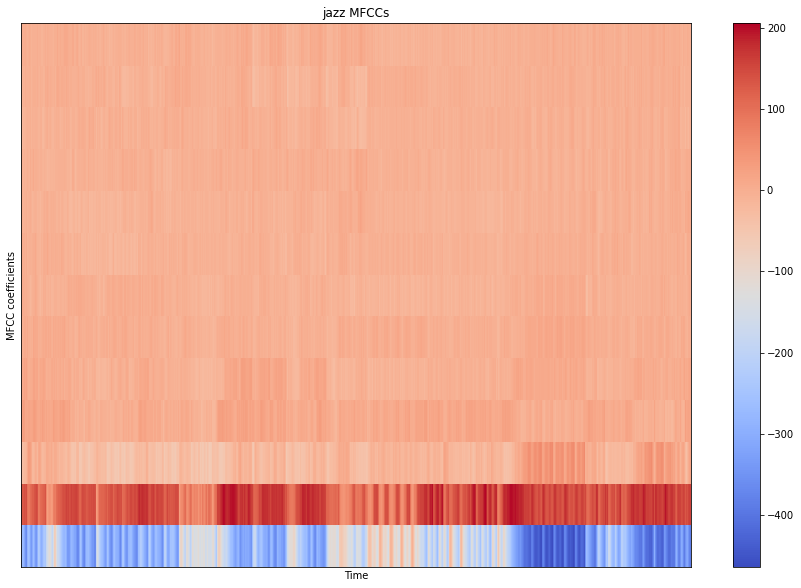

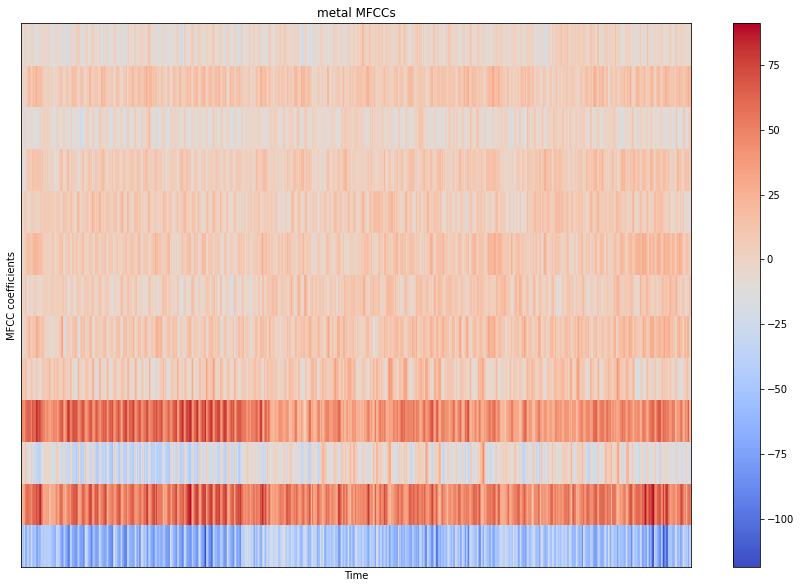

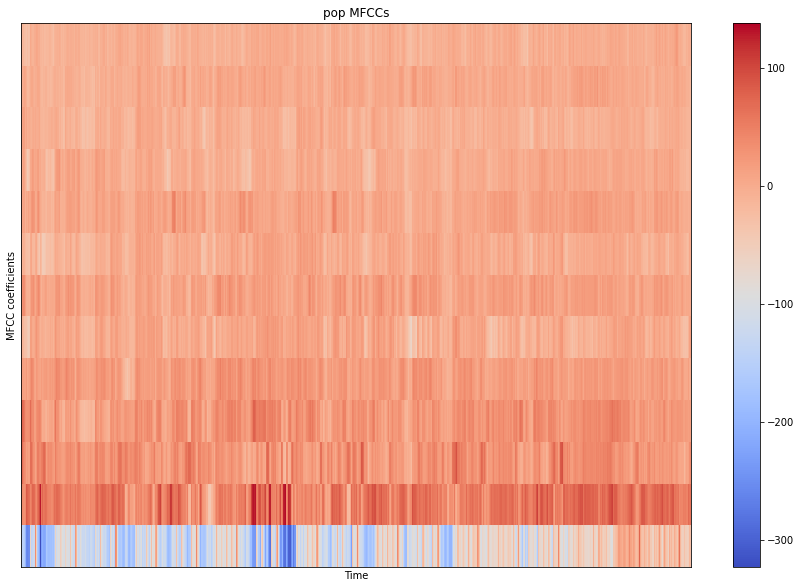

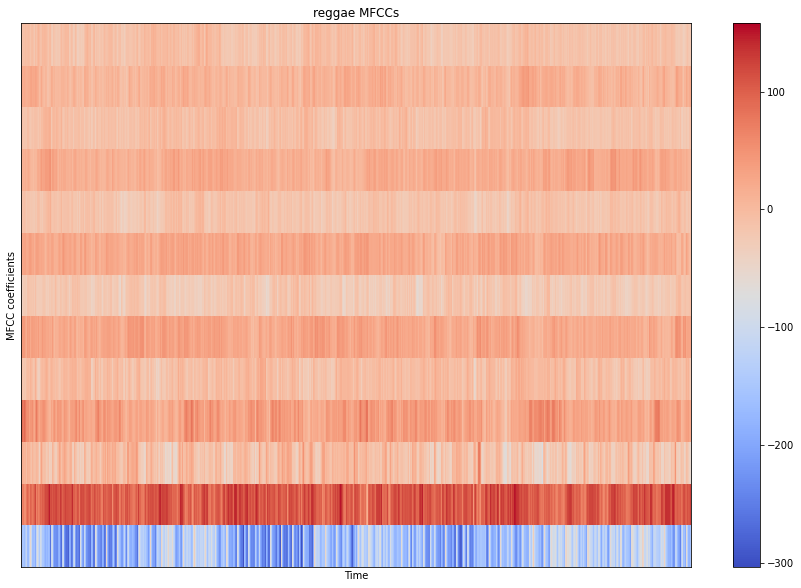

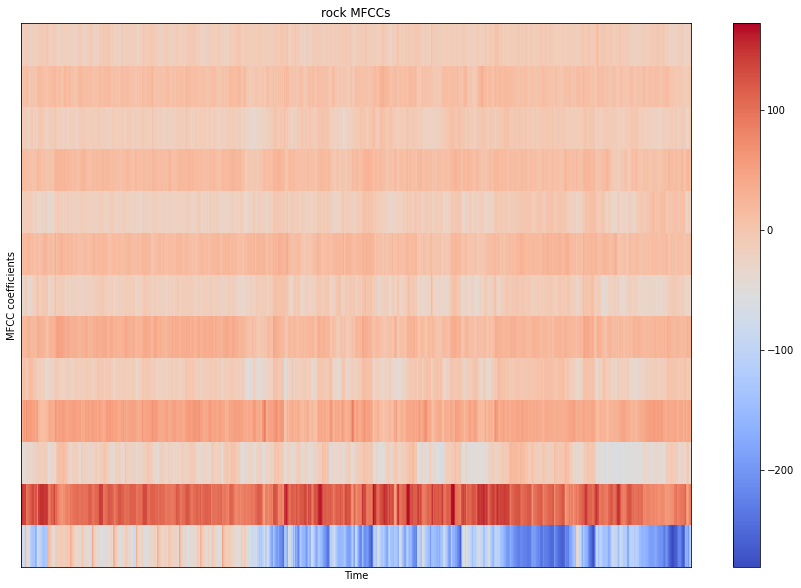

In [19]:
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
for i,g in enumerate(genres):
    signal,sr=librosa.core.load(f'/content/genres/{g}/{g}.00000.au')
    MFCCs=librosa.feature.mfcc(signal,n_fft=2048,hop_length=512,n_mfcc=13)
    plt.figure(figsize=(15,10))
    librosa.display.specshow(MFCCs,sr=22050,hop_length=512)
    plt.xlabel("Time")
    plt.ylabel("MFCC coefficients")
    plt.colorbar()
    plt.title(g +" MFCCs")
    plt.show()

* We can see some differences between two waveplots.
* With waveplots, we only have Amplitude and time information.
* We can't learn so much from only waveplots.

#SOLUTION ?

* Fourier Tranform?

**It's not a good way to analyze a complete song in time.**
* In audio processing, it is common to operate on one frame at a time using a constant frame size and hop size. Frames are typically chosen to be 10 to 100 ms in duration.
* We compute features from frames.


**Some Terms:**
* Frame Length: The number of samples in a frame.
* Hop Length: The length between frames. (in samples)
* We use 2048 frame length and 512 hop length for this work.
* Also these values are the deafults for Librosa.

In [20]:
#extracting MFCCs and genre labels and saving it in a json file
#Sampling rate is 22050 Hz.
#We take 30 seconds slices from songs.
#We get 110250 samples with 22.05 KHz sampling rate.
#We get an array of samples for each song
#Every member of the array is a sample from signal.

DATASET_PATH="/content/genres"
JSON_PATH="data_.json"
SAMPLE_RATE=22050
TRACK_DURATION=30 # measured in seconds
SAMPLES_PER_TRACK=SAMPLE_RATE*TRACK_DURATION


def save_mfcc(dataset_path,json_path,num_mfcc=13,n_fft=2048,hop_length=512,num_segments=10):

    data = {
        "mapping": [],
        "labels": [],
        "mfcc": []
    }

    samples_per_segment=int(SAMPLES_PER_TRACK/num_segments)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment/hop_length)

    # loop through all genre sub-folder
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):

        # ensure we're processing a genre sub-folder level
        if dirpath is not dataset_path:
            semantic_label = dirpath.split("\\")[-1] #genres\\blues=>["genres","blues"]
            data["mapping"].append(semantic_label)
            print("\nProcessing:{}".format(semantic_label))

            # process all audio files in genre sub-dir
            for f in filenames:
                file_path = os.path.join(dirpath, f)
                signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)

                # process all segments of audio file
                for d in range(num_segments):

                    # calculate start and finish sample for current segment
                    start=samples_per_segment * d
                    finish=start+samples_per_segment

                    # extract mfcc
                    mfcc=librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
                    mfcc=mfcc.T

                    # store only mfcc feature with expected number of vectors
                    if len(mfcc)==num_mfcc_vectors_per_segment:
                        data["mfcc"].append(mfcc.tolist())
                        data["labels"].append(i-1)
                        print("{}, segment:{}".format(file_path,d+1))

    # save MFCCs to json file
    with open(json_path, "w") as fp:
        json.dump(data,fp,indent=4)


if __name__ == "__main__":
    save_mfcc(DATASET_PATH, JSON_PATH, num_segments=10)

Streaming output truncated to the last 5000 lines.
/content/genres/country/country.00076.au, segment:6
/content/genres/country/country.00076.au, segment:7
/content/genres/country/country.00076.au, segment:8
/content/genres/country/country.00076.au, segment:9
/content/genres/country/country.00076.au, segment:10
/content/genres/country/country.00060.au, segment:1
/content/genres/country/country.00060.au, segment:2
/content/genres/country/country.00060.au, segment:3
/content/genres/country/country.00060.au, segment:4
/content/genres/country/country.00060.au, segment:5
/content/genres/country/country.00060.au, segment:6
/content/genres/country/country.00060.au, segment:7
/content/genres/country/country.00060.au, segment:8
/content/genres/country/country.00060.au, segment:9
/content/genres/country/country.00060.au, segment:10
/content/genres/country/country.00057.au, segment:1
/content/genres/country/country.00057.au, segment:2
/content/genres/country/country.00057.au, segment:3
/content/ge

In [21]:
DATA_PATH = "/content/data_.json"

def load_data(data_path):
    with open(data_path,"r") as fp:
        data=json.load(fp)
    X=np.array(data["mfcc"])
    y=np.array(data["labels"])
    print("Data succesfully loaded!")
    return X,y

if __name__ == "__main__":
    X,y=load_data(DATA_PATH)
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

Data succesfully loaded!


In [24]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((6997, 130, 13), (6997,), (2999, 130, 13), (2999,))

In [25]:
def plot_history(history):
 
    fig,axis=plt.subplots(2)

    # create accuracy sublpot
    axis[0].plot(history.history["accuracy"],label="train accuracy")
    axis[0].plot(history.history["val_accuracy"],label="test accuracy")
    axis[0].set_ylabel("Accuracy")
    axis[0].legend(loc="lower right")
    axis[0].set_title("Accuracy evaluation")

    # create error sublpot
    axis[1].plot(history.history["loss"],label="train error")
    axis[1].plot(history.history["val_loss"],label="test error")
    axis[1].set_ylabel("Error")
    axis[1].set_xlabel("Epoch")
    axis[1].legend(loc="upper right")
    axis[1].set_title("Error evaluation")
    
    plt.show()

In [26]:
model=keras.Sequential([
        keras.layers.Flatten(input_shape=(X.shape[1],X.shape[2])),
        keras.layers.Dense(512,activation='relu'),
        keras.layers.Dense(256,activation='relu'),
        keras.layers.Dense(64,activation='relu'),
        keras.layers.Dense(10, activation='softmax')
    ])

optimizer=keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()
history1=model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=32,epochs=50)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1690)              0         
                                                                 
 dense (Dense)               (None, 512)               865792    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 1,014,218
Trainable params: 1,014,218
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
219/219 [==========================

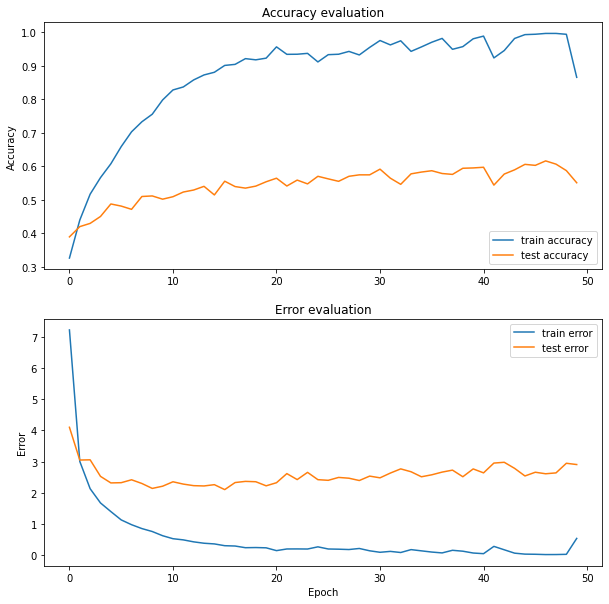

In [27]:
plot_history(history1)

In [28]:
model=keras.Sequential([
      keras.layers.Flatten(input_shape=(X.shape[1], X.shape[2])),
      keras.layers.Dense(512,activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)),keras.layers.Dropout(0.3),
      keras.layers.Dense(256,activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)),keras.layers.Dropout(0.3),
      keras.layers.Dense(64,activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)),keras.layers.Dropout(0.3),
      keras.layers.Dense(10, activation='softmax')
    ])

optimizer=keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()
history2=model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=32,epochs=100)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 1690)              0         
                                                                 
 dense_4 (Dense)             (None, 512)               865792    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                16448     
                                                                 
 dropout_2 (Dropout)         (None, 64)               

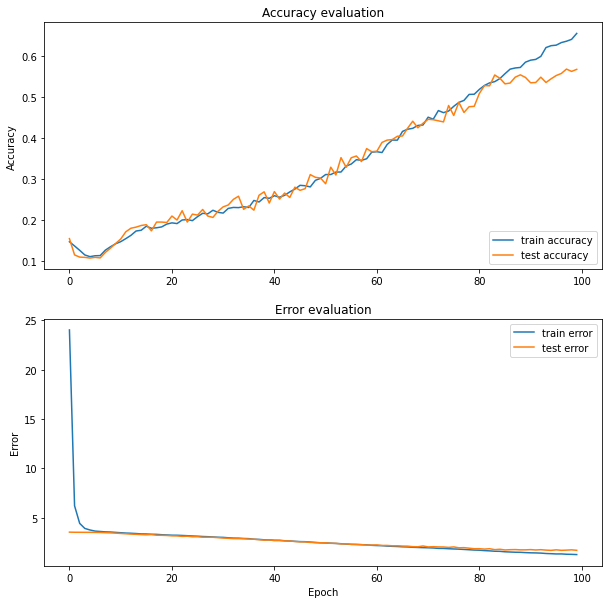

In [29]:
plot_history(history2)

#CNN

In [30]:
def prepare_datasets(test_size,validation_size):

    # load data
    X,y=load_data(DATA_PATH)

    # create train,validation and test split
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=test_size)
    X_train,X_validation,y_train,y_validation=train_test_split(X_train,y_train,test_size=validation_size)

    # add an axis to input sets
    X_train=X_train[...,np.newaxis] #4d array => (num_samples,130,13,1)
    X_validation=X_validation[...,np.newaxis]
    X_test=X_test[...,np.newaxis]

    return X_train,X_validation,X_test,y_train,y_validation,y_test

In [31]:
def predict(model, X, y):

    X=X[np.newaxis, ...] # array shape (1, 130, 13, 1)
    prediction=model.predict(X)
    predicted_index=np.argmax(prediction,axis=1)
    print("Target:{},Predicted label:{}".format(y,predicted_index))

In [32]:
np.shape(X)

(9996, 130, 13)

In [33]:
def build_model(input_shape):
    
    model=keras.Sequential()

    # 1st conv layer
    model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape))
    model.add(keras.layers.MaxPooling2D((3,3),strides=(2,2),padding='same'))
    model.add(keras.layers.BatchNormalization())

    # 2nd conv layer
    model.add(keras.layers.Conv2D(32,(3,3),activation='relu'))
    model.add(keras.layers.MaxPooling2D((3,3),strides=(2,2),padding='same'))
    model.add(keras.layers.BatchNormalization())

    # 3rd conv layer
    model.add(keras.layers.Conv2D(32,(2,2),activation='relu'))
    model.add(keras.layers.MaxPooling2D((2,2),strides=(2,2),padding='same'))
    model.add(keras.layers.BatchNormalization())

    # flatten output and feed it into dense layer
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64,activation='relu'))
    model.add(keras.layers.Dropout(0.3))

    # output layer
    model.add(keras.layers.Dense(10,activation='softmax'))

    return model

if __name__=="__main__":

    X_train,X_validation,X_test,y_train,y_validation,y_test=prepare_datasets(0.25,0.2)
    input_shape=(X_train.shape[1],X_train.shape[2],1)
    model=build_model(input_shape)
    optimizer=keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    model.summary()
    history3=model.fit(X_train,y_train,validation_data=(X_validation,y_validation),batch_size=32,epochs=30)
    test_loss,test_acc=model.evaluate(X_test,y_test,verbose=2)
    print('\nTest accuracy:',test_acc)
    
# pick a sample to predict from the test set
X_to_predict=X_test[100]
y_to_predict=y_test[100]
predict(model,X_to_predict,y_to_predict)

Data succesfully loaded!
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 11, 32)       320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 6, 32)        0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 64, 6, 32)        128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 4, 32)         9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 2, 32)        0         
 2D)                                                             
                             

In [34]:
print('\nTest accuracy:',test_acc)


Test accuracy: 0.7010804414749146


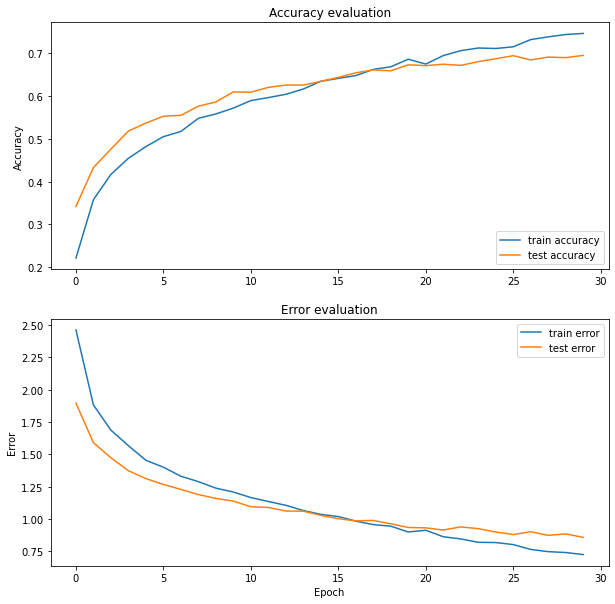

In [35]:
plot_history(history3)

#RNN

In [36]:
def prepare_datasets(test_size, validation_size):

    # load data
    X,y=load_data(DATA_PATH)

    # create train, validation and test split
    X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    return X_train, X_validation, X_test, y_train, y_validation, y_test


In [37]:
def build_model(input_shape):

    model = keras.Sequential()

    # 2 LSTM layers
    model.add(keras.layers.LSTM(64, input_shape=input_shape, return_sequences=True))
    model.add(keras.layers.LSTM(64))

    # dense layer
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.3))

    # output layer
    model.add(keras.layers.Dense(10, activation='softmax'))

    return model


if __name__ == "__main__":

    # get train, validation, test splits
    X_train, X_validation, X_test, y_train, y_validation, y_test=prepare_datasets(0.25, 0.2)

    # create network
    input_shape=(X_train.shape[1], X_train.shape[2]) # 130, 13
    model=build_model(input_shape)

    # compile model
    optimizer=keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    model.summary()
    history4=model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=30)

    # evaluate model on test set
    test_loss,test_acc=model.evaluate(X_test,y_test,verbose=2)


Data succesfully loaded!
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 130, 64)           19968     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 10)                650       
                                                                 
Total params: 57,802
Trainable params: 57,802
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
188/188 [=====

In [38]:
X_to_predict=X_test[100]
y_to_predict=y_test[100]
predict(model,X_to_predict,y_to_predict)

1/1 [==============================] - 1s 614ms/step
Target:3,Predicted label:[3]


In [39]:
print('\nTest accuracy:',test_acc)


Test accuracy: 0.6058423519134521


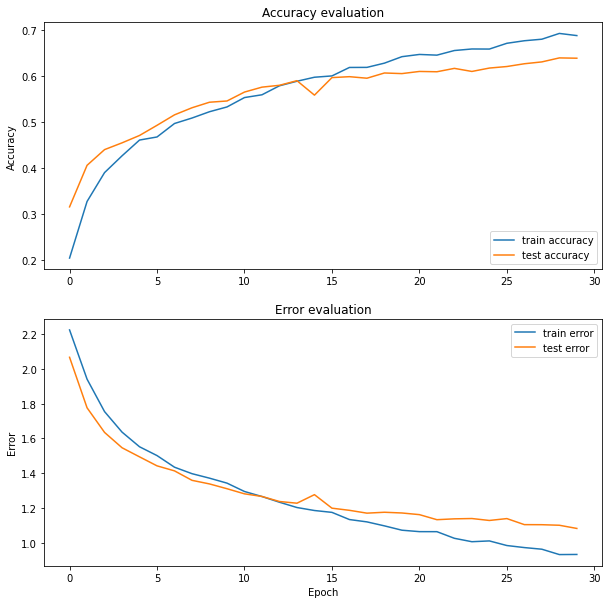

In [40]:
plot_history(history4)